In [1]:
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import Altair for high level plotting
import altair as alt
import altair_catplot as altcat

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.plotting

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()
alt.renderers.enable('notebook')

# Pevent bulky altair plots
alt.data_transformers.enable('json')

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

Loading BokehJS ...

In [2]:
# Load the data into DataFrame df
df = pd.read_csv('../data/130315_1A_aanat2.csv', comment='#')

In [4]:
df.head()

,location,activity,time,zeit,zeit_ind,day
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4
1,2,1.4,2013-03-15 18:31:09,-14.480833,-869,4
2,3,0.0,2013-03-15 18:31:09,-14.480833,-869,4
3,4,0.0,2013-03-15 18:31:09,-14.480833,-869,4
4,5,0.0,2013-03-15 18:31:09,-14.480833,-869,4


In [9]:
dataframes = []
for i in range(1, 97):
    dataframes.append(df[df['location'] == i])


(to do multiple, sort by the location to make sure you are always considering the right fish)

array = [1, 2, 3, 4, .... ]

active_minutes_count = 0
for activity seconds in each one minute entry:
    if activity > 1:
        count +=1
    else:
        count = 0
        add this particular entry to the bucket
        

In [20]:
activity_array = []

for i, d in enumerate(dataframes):
    
    activity_array.append([0] * d.shape[0])
    active_minutes_count = 0
    
    for index, row in d.iterrows():
        if row['activity'] > 0: # our fishy is still active
            active_minutes_count += 1
        else: # we have entered a period of inactivity
            activity_array[i][active_minutes_count] += 1
            active_minutes_count = 0

<function matplotlib.pyplot.show(*args, **kw)>

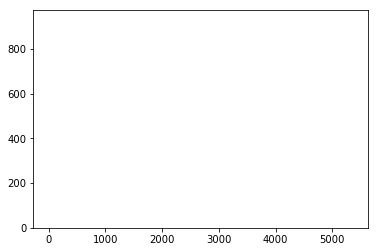

In [21]:
plt.bar(range(len(activity_array[20])), activity_array[20], align='center', alpha=0.5)
plt.show

In [19]:
activity_array[0:10]

[[814,
  43,
  24,
  10,
  11,
  9,
  8,
  9,
  6,
  2,
  4,
  10,
  4,
  2,
  3,
  1,
  3,
  5,
  0,
  1,
  3,
  0,
  4,
  0,
  1,
  2,
  1,
  1,
  0,
  1,
  2,
  1,
  2,
  2,
  0,
  2,
  1,
  0,
  2,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0